In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data = yf.download("GOOGL" , start = "2019-01-01" , interval = '1d')
data.head()



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,51.360001,53.039501,51.264000,52.734001,52.734001,31868000
2019-01-03,52.533501,53.313000,51.118500,51.273499,51.273499,41960000
2019-01-04,52.127998,54.000000,51.842999,53.903500,53.903500,46022000
2019-01-07,54.048500,54.134998,53.132000,53.796001,53.796001,47446000
2019-01-08,54.299999,54.667500,53.417500,54.268501,54.268501,35414000


In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1177 entries, 2019-01-02 to 2023-09-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1177 non-null   float64
 1   High       1177 non-null   float64
 2   Low        1177 non-null   float64
 3   Close      1177 non-null   float64
 4   Adj Close  1177 non-null   float64
 5   Volume     1177 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 64.4 KB


In [ ]:
# checking for any duplicate values
data.duplicated().any()



False

In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
# Get the statistics of the data
data.describe()



,Open,High,Low,Close,Adj Close,Volume
count,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1.177000e+03
mean,95.650744,96.759707,94.604685,95.707826,95.707826,3.402900e+07
std,29.114068,29.403226,28.773532,29.069253,29.069253,1.517561e+07
min,51.360001,52.500000,50.443501,51.273499,51.273499,9.312000e+06
25%,67.595497,68.216499,67.208504,67.595497,67.595497,2.445800e+07
50%,95.449997,96.930000,94.150002,95.599998,95.599998,3.039330e+07
75%,120.000000,121.080002,118.720001,119.900002,119.900002,3.826200e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.331780e+08


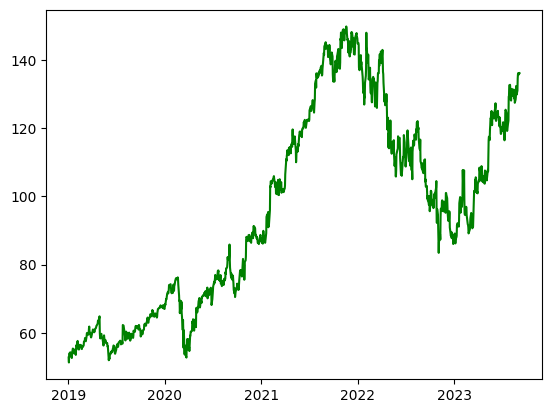

In [ ]:
# plot the 'Close' feature
plt.plot(data.index, data['Close'], color = 'green', label = 'Close')
plt.show()



In [ ]:
# saving 'Close' feature in a variable name dataV1, since we only need that
dataV1 = data.iloc[:,3:4]
dataV1 = dataV1.values
dataV1.shape

(1177, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# normalizing the data
Scaler = MinMaxScaler(feature_range=(0,1))
dataV1 = Scaler.fit_transform(dataV1)
dataV1.shape



(1177, 1)

In [ ]:
# declaring feature length
feature_length = 100



In [ ]:
# Function to create x and y data
def Create_Features_and_Targets(data, feature_length):
  X = list()
  Y = list()
  for i in range(len(data) - feature_length -1):
    X.append(data[i:(i + feature_length), 0])
    Y.append(data[i + feature_length, 0])
  X = np.array(X)
  Y = np.array(Y)
  return X,Y



In [ ]:
X_train, y_train = Create_Features_and_Targets(dataV1, feature_length)



In [ ]:
# Making data 3 dimensional
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))



In [ ]:
X_train.shape, y_train.shape



((1076, 100, 1), (1076,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM



In [ ]:
# model
model = Sequential([
    LSTM(100, return_sequences = True, input_shape =(X_train.shape[1],1)),
    Dropout(0.3),

    LSTM(100, return_sequences = False),
    Dropout(0.3),
    Dense(1),
])
model.compile(optimizer='adam',loss="mean_squared_error")



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
history = model.fit(
    X_train,
    y_train,
    epochs = 100,
    batch_size = 12,
    verbose=1,
)



Epoch 1/100
90/90 [==============================] - 15s 113ms/step - loss: 0.0159
Epoch 2/100
90/90 [==============================] - 11s 118ms/step - loss: 0.0041
Epoch 3/100
90/90 [==============================] - 11s 121ms/step - loss: 0.0041
Epoch 4/100
90/90 [==============================] - 11s 121ms/step - loss: 0.0040
Epoch 5/100
90/90 [==============================] - 12s 131ms/step - loss: 0.0038
Epoch 6/100
90/90 [==============================] - 11s 122ms/step - loss: 0.0036
Epoch 7/100
90/90 [==============================] - 11s 121ms/step - loss: 0.0038
Epoch 8/100
90/90 [==============================] - 10s 108ms/step - loss: 0.0031
Epoch 9/100
90/90 [==============================] - 11s 121ms/step - loss: 0.0041
Epoch 10/100
90/90 [==============================] - 11s 121ms/step - loss: 0.0035
Epoch 11/100
90/90 [==============================] - 11s 121ms/step - loss: 0.0030
Epoch 12/100
90/90 [==============================] - 11s 121ms/step - loss: 0.0030
E

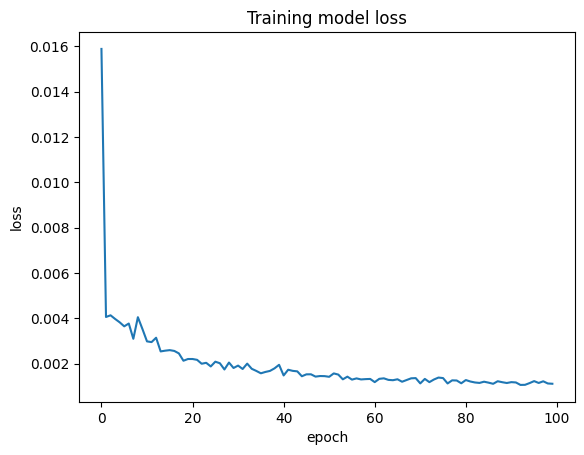

In [ ]:
# plotting the loss from the training model
plt.plot(history.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()



In [ ]:
testData = data.iloc[:,3:4] # Get 'Close' feature
y_real = testData.iloc[feature_length+1:,0:].values # Actual Stock values
x_test = testData.iloc[:,0:].values  # values from whole data to test
y_real.shape, x_test.shape



((1076, 1), (1177, 1))

In [ ]:
# normalizing the Data using Scaler.transform function
x_test = Scaler.transform(x_test)
x_test.shape

(1177, 1)

In [ ]:
x_test, y_test = Create_Features_and_Targets(x_test, feature_length)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1)) # Making data 3 dimensional
x_test.shape



(1076, 100, 1)

In [ ]:
# making predictions
y_pred = model.predict(x_test)



34/34 [==============================] - 2s 47ms/step


In [ ]:
predicted_price = Scaler.inverse_transform(y_pred)



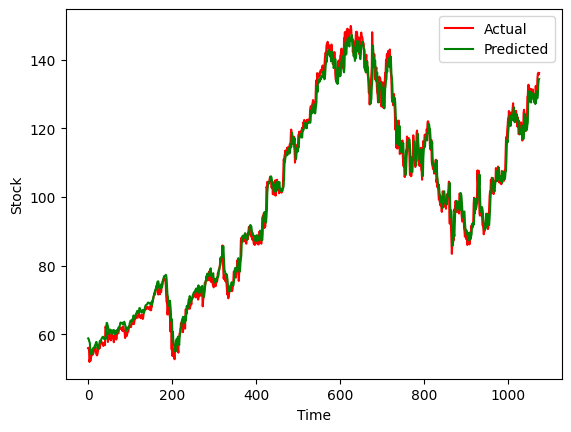

In [ ]:
# plotting the Actual Stock Price and the Predicted Stock Price
plt.plot(y_real, color = 'red', label = 'Actual')
plt.plot(predicted_price, color = 'green', label = 'Predicted')

plt.xlabel('Time')
plt.ylabel('Stock')
plt.legend()
plt.show()


In [ ]:
def predict_given_date(data, date, feature_length):
  if date not in data.index:
    data.loc[pd.Timestamp(date)] = 0
  idx = data.index.get_loc(date)
  close_col = data.iloc[:,3:4]
  close_col = close_col.iloc[idx - feature_length : idx,:].values
  close_col = np.expand_dims(Scaler.transform(close_col) , axis = 0)
  Prediction = model.predict(close_col)
  Prediction = Scaler.inverse_transform(Prediction)
  return Prediction



In [ ]:
predict_given_date(data, '2023-09-01', feature_length)


1/1 [==============================] - 0s 58ms/step


array([[134.35078]], dtype=float32)

In [ ]:
l = data.index.get_loc('2023-09-01')
data.iloc[l: l+1,:]['Close']

Date
2023-09-01    135.660004
Name: Close, dtype: float64

In [ ]:
data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,51.360001,53.039501,51.264000,52.734001,52.734001,31868000
2019-01-03,52.533501,53.313000,51.118500,51.273499,51.273499,41960000
2019-01-04,52.127998,54.000000,51.842999,53.903500,53.903500,46022000
2019-01-07,54.048500,54.134998,53.132000,53.796001,53.796001,47446000
2019-01-08,54.299999,54.667500,53.417500,54.268501,54.268501,35414000
...,...,...,...,...,...,...
2023-08-30,134.779999,136.279999,134.070007,135.880005,135.880005,28315800
2023-08-31,136.009995,138.000000,135.789993,136.169998,136.169998,30053800
2023-09-01,137.460007,137.460007,134.850006,135.660004,135.660004,21524600
